# Scaling Solution Signal

## This notebook presents the "double sum" performed in order to extract the polarization signal from all Hubble time steps

helper_functions.ipynb:98: RuntimeWarning: divide by zero encountered in double_scalars
  "            \n",


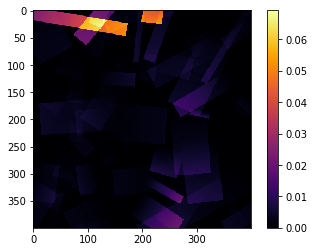

helper_functions.ipynb:98: RuntimeWarning: divide by zero encountered in double_scalars
  "            \n",


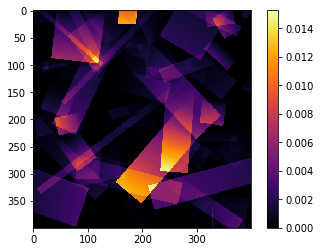

helper_functions.ipynb:98: RuntimeWarning: divide by zero encountered in double_scalars
  "            \n",


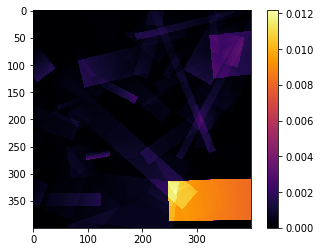

In [5]:
# Run the helper_functions program in order to access all the helper functions

%run helper_functions.ipynb

In [6]:
# Import relevant modules

from matplotlib.colors import LogNorm

from matplotlib.colors import SymLogNorm

import matplotlib

import copy

In [7]:
# Consistency check:

a = CosmicString(0,0)
b = CosmicString(10,10)

print(a.polarization_signal)
print(b.polarization_signal)

# The later wakes have weaker signals -- consistent!

0.0002577361518906448
1.0609294919019867e-08


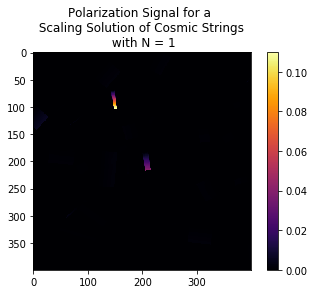

In [9]:
# The following code contains the full double sum
# i.e. the "inner sum" and the "outer sum"

N = 1 # Feel free to change this variable as necessary

# Everything below this line doesn't need to be altered (no hard coding required)
################################################################################################

signal_list = []
N_list = [] # List of the number of wakes in total at each time step (N weighed by size of hubble volume)

for i in range(len(hubble_time_steps())):
    N_list.append(int(round(10**2 / hubble_angular_distances()[i]**2 * N)))

for i,c in enumerate(N_list):
    
    for j in range(0, i):
        
        for k in range(0, c):
            
            a = CosmicString(j,i)
            
            if a.length_depth_choice == True:
            
                adjust_length = int(round(hubble_pixel_size(j, 400) * a.c1)) * np.cos(a.theta)
            
                adjust_depth = int(round(hubble_pixel_size(j, 400) * a.vsgammas)) 
                
            else:
                
                adjust_length = int(round(hubble_pixel_size(j, 400) * a.c1)) 
            
                adjust_depth = int(round(hubble_pixel_size(j, 400) * a.vsgammas)) * np.cos(a.theta)
                
            
            signal_list.append(a.map_signal(adjust_length, adjust_width, 400))
            
zeros = np.zeros((400,400))

for i in signal_list:
    zeros += i

# Setting zeros so that they will print black instead of white on a log scale
my_cmap = copy.copy(matplotlib.cm.get_cmap('inferno')) # copy the default cmap
my_cmap.set_bad((0,0,0))

# Activate the line below to see the map on a log scale:
# plt.imshow(zerps, cmap=my_cmap, Norm=LogNorm())

plt.imshow(zeros, cmap=my_cmap)
plt.colorbar()

plt.title(f"Polarization Signal for a \n Scaling Solution of Cosmic Strings \n with N = {N}")

plt.show()
